## Import the relevant libraries

In [1]:
import numpy as np #mathematical operations
import matplotlib.pyplot as plt #graphs
from mpl_toolkits.mplot3d import Axes3D

Elements of the model in supervised learning:
1. Inputs --> define
2. Weights --> computer
3. Biases --> computer
4. Outputs --> computer
5. Targets --> define

## Generate random input to train on

Create fake data with a linear relationship

In [2]:
observations = 1000

#We will create a two variable linear model
#f(x,z) = a*x + b*z + c

#size = n (no. observations) * k (no. variables)

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(-10,10,(observations,1))

#From the linear model, inputs = n * k = 1000 * 2
inputs = np.column_stack((xs, zs))
#stacks the observations into a 1000*2 matrix

print(inputs.shape)

(1000, 2)


## Create the targets we will aim at

The algorithm will have to figure the preset relationship on its own 

targets = f(x,z) = 2*x - 3*z + 5 + noise

This is chosen arbitrarily, can try different functions for homework.

Noise is introduced to randomise data, so refelcts real-world data.

Conceptually, the algorithm must learn this is the function.

In [3]:
noise = np.random.uniform(-1,1,(observations, 1))

In [4]:
targets = 2*xs - 3*zs + 5 + noise
#2*xs is a vector 1000*1
#3*zs is a vector 1000*1
#5 is a scalar
#targets should have the shape 1000*1
print(targets.shape)

(1000, 1)


In [5]:
xs.ndim

2

In [6]:
zs.ndim

2

ax.plot3D requires xs and zs be one dimensional

In [7]:
#???

## Plot the training data

Observe there is a strong trend the model should reproduce.

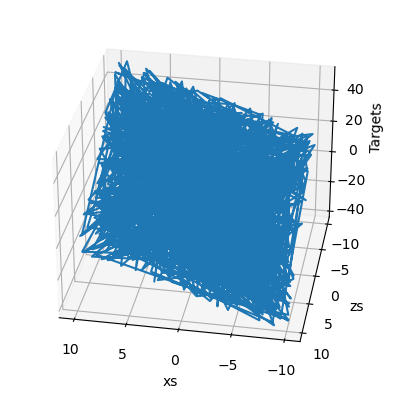

In [8]:
targets1 = targets.reshape(observations,)
xs1 = xs.reshape(observations,)
zs1 = zs.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(xs1, zs1, targets1)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()

## Initialise variables

In [9]:
init_range = 0.1
#Our initial weights and biases will be picked randomly from the interval [-0.1,0.1]

## Create weights

In [10]:
weights = np.random.uniform(-init_range,init_range,size=(2,1))
#The size of the weights variable is 2*1 as we have two weights
# One for each input variable, and a single output

## Create biases

In [11]:
biases = np.random.uniform(-init_range,init_range,size=1)
#Bias is a scalar
#In ML there are as many biases and there are outputs

In [12]:
print(weights) 
print(biases)

[[-0.02421791]
 [ 0.06730416]]
[-0.0706802]


## Set a learning rate

In [13]:
learning_rate = 0.02 #good for this model

## Train the model

In [14]:
#Minimising the loss function with respect to the weights and biases

for i in range (100):
    #Calculate outputs, multiplying matrices needs dot metho
    outputs = np.dot(inputs,weights) + biases # 1000*2,2*1 results is 1000*1 matrix and scalar added element wise
    #Compare outputs to targets through the loss
    deltas = outputs - targets # deltas is 1000*1 array
    # Print the loss for each iteration, we will use L2-norm loss / 2 ... division by 2 doesn't change logic of loss function
    # makes learning independent of the number of observations, we adjust loss instead of learning rate
    # so we get same learning for 1000 or 10000 observations
    loss = np.sum(deltas ** 2) / 2 / observations # mean loss, average loss for observation
    print(loss) # is it decreasing?
    #Adjust weights and biases, following gradient descent methodology
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    #2*1        2*1      Scalar                2*1000  1000*1 = 2*1
    #Transpose so dot product can be evaluated
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    #will improve with the number of iterations

252.12642070025032
32.550368026655725
13.730506280852767
11.694364323855162
11.106054164700494
10.660904030966412
10.244266564224644
9.845148218765575
9.461923611291441
9.093871514406782
8.74038203358673
8.400877974006594
8.074805904933678
7.761634395805067
7.460853053450577
7.171971679089589
6.894519468103445
6.628044242581539
6.372111714364651
6.12630477726118
5.890222827267738
5.663481109684548
5.445710092061203
5.2365548619509426
5.035674548491887
4.842741766872529
4.657442084776156
4.479473509934592
4.308545997956099
4.144380979625384
3.9867109069052242
3.835278816899916
3.6898379130698236
3.5501511630145877
3.4159909121694128
3.2871385127849093
3.1633839675858
3.0445255875277204
2.9303696630943894
2.820730148599402
2.715428358978165
2.6142926785758034
2.5171582814564424
2.42386686277804
2.3342663807949746
2.2482108090679276
2.165559898477194
2.0861789486516
2.009938588440492
1.9367145650710318
1.8663875416471536
1.7988429026602
1.7339705671942145
1.6716648095215099
1.611824086796

## Print weights and biases to see if we have work correctly

In [15]:
#t = f(xs,zs) = 2*xs - 3*zs + 5 + noise

print(weights, biases)

[[ 1.99351243]
 [-2.99872434]] [4.32596724]


## Plot last outputs vs targets

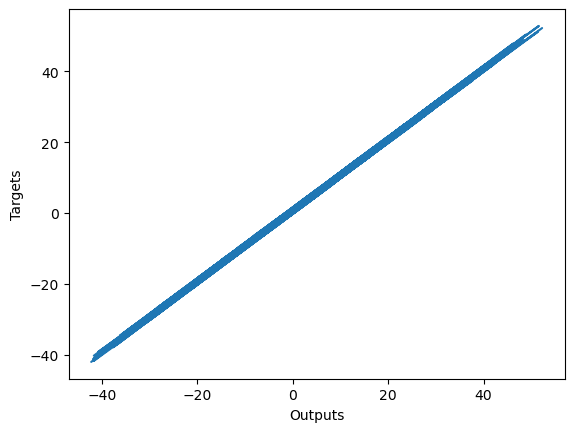

In [16]:
plt.plot(outputs,targets)
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()

The closer the plot is to a 45 degree line, the closer it is to the targets.